# Biological data analysis

2020-10-05

Send solutions (ipynb and pdf or html) till 2020-10-10 23:55 to
avoicikas@gmail.com

Fill in your name:

Evaluation:

- Comments
- Applied methods
- Figures
- Results

---
>> **TASK**
>>
>> - Import and fix the speech data.
>>
>> - How different methods dealing with the missing data
>> (interpolation etc.) affect the time-frequency plots of the data.
>>
>> Data file exam/A5/speech.csv
>>

---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pathlib
from scipy import signal

df=pd.read_csv('./speech.csv')
df.columns

Index(['Speech data', ' V'], dtype='object')

In [2]:
sf=7418
df.head()

,Speech data,V
0,sample rate = 7418 Hz,NaN
1,# 0.0065352V,NaN
2,# -0.0078097V,NaN
3,# -0.055054V,NaN
4,# -0.071228V,NaN


In [3]:
df=df.drop(labels=' V', axis=1).drop(index=0,axis=1)
df.head()

,Speech data
1,# 0.0065352V
2,# -0.0078097V
3,# -0.055054V
4,# -0.071228V
5,# -0.10695V


In [4]:
df=df.iloc[:,0].str.strip('#').str.strip('V').astype(float)
df.head()

1    0.006535
2   -0.007810
3   -0.055054
4   -0.071228
5   -0.106950
Name: Speech data, dtype: float64

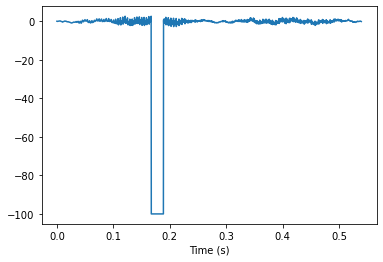

In [6]:
t=np.linspace(0,df.shape[0]/sf,df.shape[0])
plt.plot(t,df)
plt.xlabel('Time (s)');

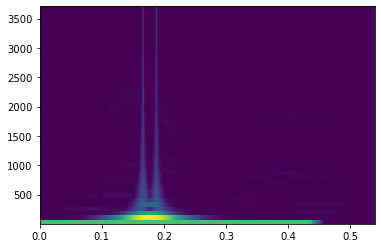

In [7]:
freq = np.linspace(1, sf/2, 50)
w = 20
widths = w * (sf) / (2 * freq * np.pi)
cwtm = signal.cwt(df, signal.morlet2, widths, w=w)
plt.pcolormesh(t, freq, np.abs(cwtm), cmap="viridis");


In [8]:
df[df==-100] = np.nan

Interpolate

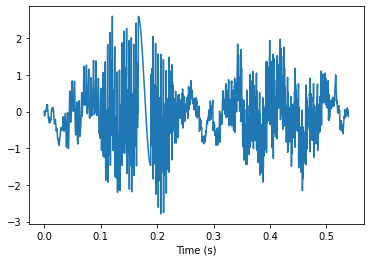

In [10]:
dff = df.copy().interpolate(method='pchip')
plt.plot(t,dff)
plt.xlabel('Time (s)');

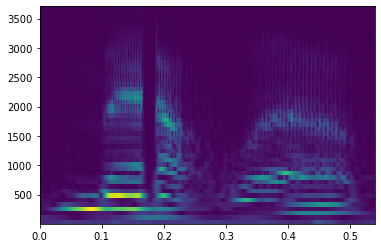

In [11]:
freq = np.linspace(1, sf/2, 50)
w = 20
widths = w * (sf) / (2 * freq * np.pi)
cwtm = signal.cwt(dff, signal.morlet2, widths, w=w)
plt.pcolormesh(t, freq, np.abs(cwtm), cmap="viridis")
plt.show()

Interpolate with nearest neighbours

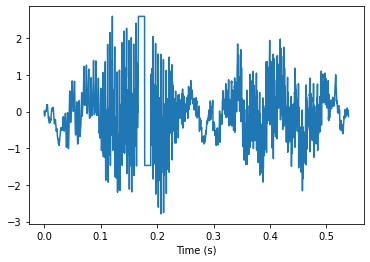

In [13]:
dff = df.copy().interpolate(method='nearest')
plt.plot(t,dff)
plt.xlabel('Time (s)');

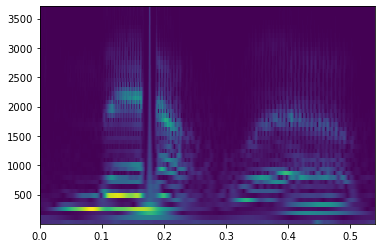

In [14]:
freq = np.linspace(1, sf/2, 50)
w = 20
widths = w * (sf) / (2 * freq * np.pi)
cwtm = signal.cwt(dff, signal.morlet2, widths, w=w)
plt.pcolormesh(t, freq, np.abs(cwtm), cmap="viridis")
plt.show()

Delete

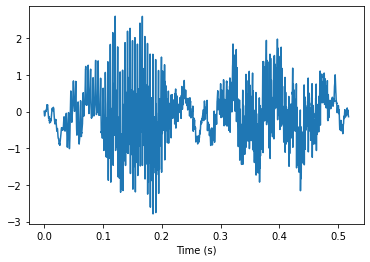

In [15]:
dff = df.copy().dropna()
t=np.linspace(0,dff.shape[0]/sf,dff.shape[0])
plt.plot(t,dff)
plt.xlabel('Time (s)');

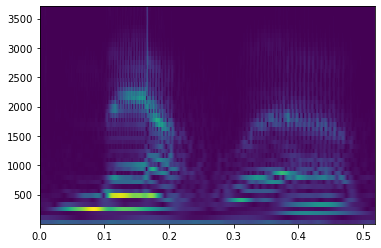

In [16]:
freq = np.linspace(1, sf/2, 50)
w = 20
widths = w * (sf) / (2 * freq * np.pi)
cwtm = signal.cwt(dff, signal.morlet2, widths, w=w)
plt.pcolormesh(t, freq, np.abs(cwtm), cmap="viridis");

Fill with mean

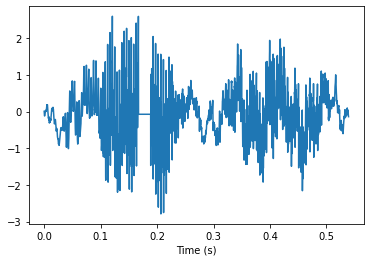

In [17]:
dff = df.copy().fillna(df.mean())
t=np.linspace(0,dff.shape[0]/sf,dff.shape[0])
plt.plot(t,dff)
plt.xlabel('Time (s)');

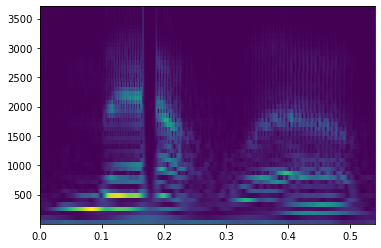

In [18]:
freq = np.linspace(1, sf/2, 50)
w = 20
widths = w * (sf) / (2 * freq * np.pi)
cwtm = signal.cwt(dff, signal.morlet2, widths, w=w)
plt.pcolormesh(t, freq, np.abs(cwtm), cmap="viridis");

Fill with samples from data

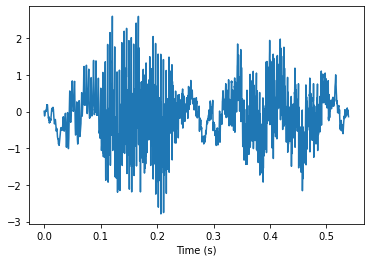

In [19]:
dff = df.copy().apply(lambda x: np.random.choice(df.copy().dropna().values) if np.isnan(x) else x)
t=np.linspace(0,dff.shape[0]/sf,dff.shape[0])
plt.plot(t,dff)
plt.xlabel('Time (s)');

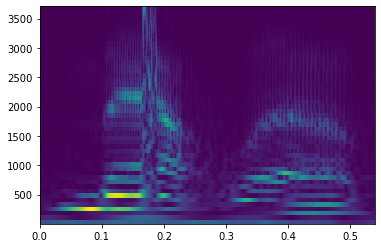

In [20]:
freq = np.linspace(1, sf/2, 50)
w = 20
widths = w * (sf) / (2 * freq * np.pi)
cwtm = signal.cwt(dff, signal.morlet2, widths, w=w)
plt.pcolormesh(t, freq, np.abs(cwtm), cmap="viridis");

---
>> **TASK**
>>
>> EEG power bands analysis.
>>
>> ![powerbands](./powerBandsEEG.jpeg)
>>
>> - Calculate average power in these intervals.
>> - Compare eyes open (EO) and eyes closed (EC) conditions.
>>
>> exam/A5/EO.csv and EC.csv or set/fdt matlab files
---

In [21]:
import mne
import pathlib

def import_eeg(ifile):
    data = mne.io.read_raw_eeglab(ifile, eog='auto')
    data.load_data()
    try:
        data.set_channel_types({'EKG': 'ecg'})
        ecg=1
    except Exception:
        print('no ecg')
        ecg=0
    data.set_montage('standard_1020')
    data.set_eeg_reference(ref_channels='average')
    return data, ecg

In [22]:
data_dir = './'
files = list(pathlib.Path(data_dir).glob('*.set'))
files

[PosixPath('EC.set'), PosixPath('EO.set')]

Reading EC.fdt
Reading 0 ... 111802  =      0.000 ...   218.363 secs...


<ipython-input-21-ee032196f740>:5: RuntimeWarning: Data file name in EEG.data (music23EC.fdt) is incorrect, the file name must have changed on disk, using the correct file name (EC.fdt).
  data = mne.io.read_raw_eeglab(ifile, eog='auto')
<ipython-input-21-ee032196f740>:5: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  data = mne.io.read_raw_eeglab(ifile, eog='auto')


no ecg
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom EEG reference.
Reading EO.fdt
Reading 0 ... 89407  =      0.000 ...   174.623 secs...


<ipython-input-21-ee032196f740>:5: RuntimeWarning: Data file name in EEG.data (music23EO.fdt) is incorrect, the file name must have changed on disk, using the correct file name (EO.fdt).
  data = mne.io.read_raw_eeglab(ifile, eog='auto')
<ipython-input-21-ee032196f740>:5: RuntimeWarning: Limited 1 annotation(s) that were expanding outside the data range.
  data = mne.io.read_raw_eeglab(ifile, eog='auto')
<ipython-input-21-ee032196f740>:5: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  data = mne.io.read_raw_eeglab(ifile, eog='auto')


no ecg
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom EEG reference.
Effective window size : 4.000 (s)


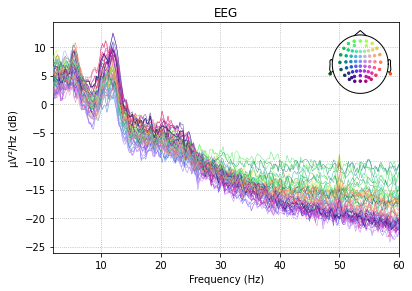

In [23]:
dataEC, ecgon = import_eeg(str(files[0]))
dataEO, ecgon = import_eeg(str(files[1]))
dataEC.plot_psd(fmin=2,fmax=60);

Effective window size : 4.000 (s)


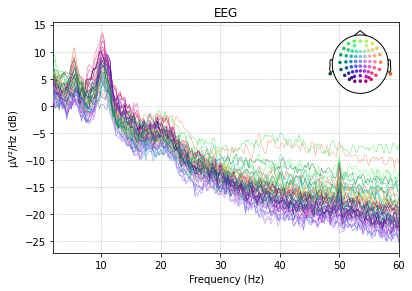

In [24]:
dataEO.plot_psd(fmin=2,fmax=60);

In [25]:
def eeg_power_band(data):
    FREQ_BANDS = {"delta": [0.5, 4.5],
                  "theta": [4.5, 8.5],
                  "alpha": [8.5, 11.5],
                  "beta": [15.5, 30],
                  "gamma": [30, 50],
                  }
    psds, freqs = mne.time_frequency.psd_welch(data, picks='eeg', fmin=0.5, fmax=50.)
    psds /= np.sum(psds, axis=-1, keepdims=True)
    X = []
    for fmin, fmax in FREQ_BANDS.values():
        psds_band = psds[:, (freqs >= fmin) & (freqs < fmax)].mean(axis=-1)
        X.append(psds_band.reshape(len(psds), -1))
    return np.concatenate(X, axis=1)

In [26]:
bandsEO=pd.DataFrame(eeg_power_band(dataEO), columns=['delta','theta','alpha','beta','gamma'],index=dataEC.ch_names)
bandsEC=pd.DataFrame(eeg_power_band(dataEC), columns=['delta','theta','alpha','beta','gamma'],index=dataEC.ch_names)
bandsDiff=bandsEC-bandsEO
bandsEC.shape

Effective window size : 0.500 (s)
Effective window size : 0.500 (s)


(64, 5)

In [27]:
bandsEC.head()

,delta,theta,alpha,beta,gamma
Fp1,0.225144,0.113128,0.082369,0.009406,0.003272
Fpz,0.197043,0.129144,0.097813,0.008440,0.001531
Fp2,0.227749,0.111964,0.084956,0.008662,0.001830
F7,0.210827,0.107553,0.097733,0.010433,0.002855
F3,0.190983,0.146802,0.088109,0.010319,0.002343


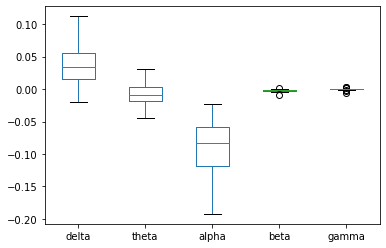

In [29]:
bandsDiff.plot(kind='box');

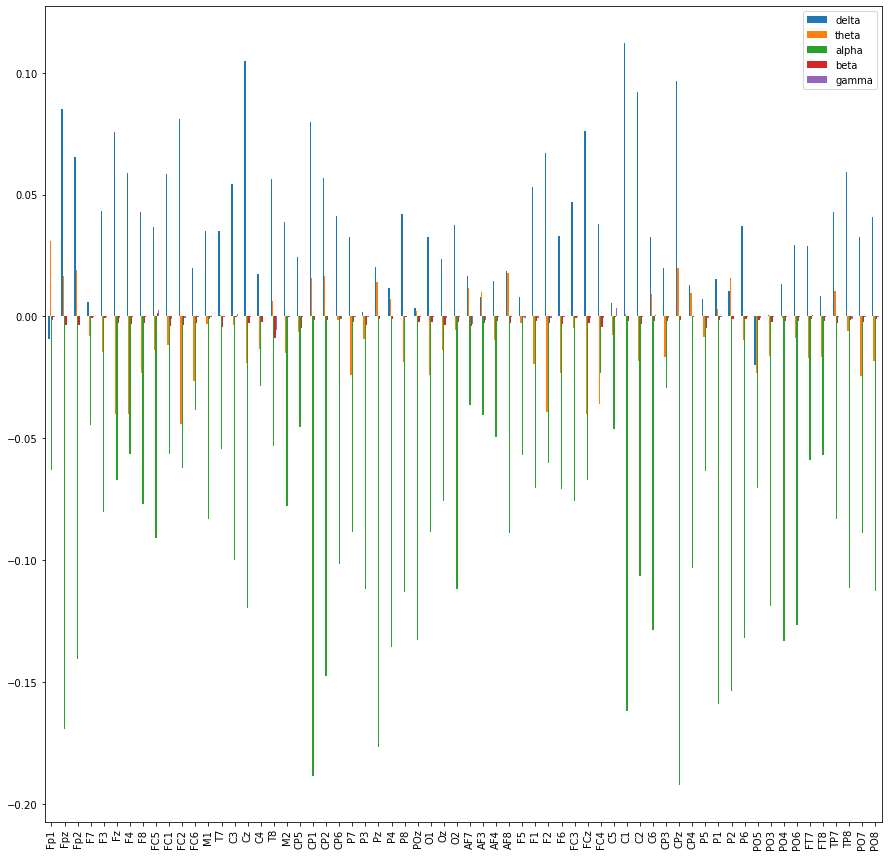

In [31]:
bandsDiff.plot(kind='bar',figsize=(15,15));

---
>> **TASK**
>>
>> Earthquakes and explosions present similar time-domain signals.
>> It is important to differentiate between these events.
>>
>> Data file exam/A5/ExplosionOrEarthquake.csv contains 16 recordings.
>> First 8 columns are seismic recordings of earthquake and the last 8 of
>> explosions.
>>
>>
>> Find:
>>
>> - The start time of the earthquake.
>> - Frequency and power of the earthquake.
>> - Duration of the earthquake.
>> - Compare earthquakes with explosions.
>>

---

In [32]:
data=pd.read_csv('ExplosionOrEarthquake.csv', names=[str(x) for x in range(1,17)])
data.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.000818,-0.208030,-0.020997,-0.064262,0.134690,0.050881,-0.019262,-0.021916,0.041018,0.042617,-0.008053,-0.073002,-0.110650,-0.027236,-0.056327,0.20072
1,0.033801,0.030319,-0.041993,-0.016235,0.086986,0.076963,-0.020047,-0.252670,0.030043,0.026397,-0.001922,-0.094665,-0.098188,-0.009590,-0.085072,0.24160
2,0.016628,0.099049,-0.068165,-0.085908,0.116170,0.082174,-0.011505,-0.171570,0.023733,0.025761,-0.011164,-0.114400,-0.078099,-0.033374,-0.111310,0.30727
3,0.004634,0.203350,-0.067869,-0.098760,0.113360,0.058811,-0.025916,-0.144020,0.012895,0.033712,-0.018302,-0.090807,-0.064241,-0.006138,-0.103880,0.32338
4,-0.036527,0.540780,-0.034452,-0.040586,0.048824,0.013746,-0.026069,-0.319670,0.002607,0.014948,-0.013086,-0.031011,-0.048235,-0.011892,-0.082565,0.20939


In [33]:
data.shape

(2048, 16)

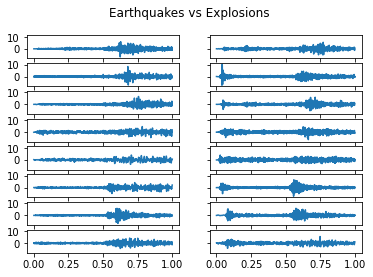

In [35]:
sf=2048
t=np.linspace(0,data.shape[0]/sf,data.shape[0])
fig ,ax = plt.subplots(8, 2,sharex=True,sharey=True)
ax=ax.ravel(order='F')
for ii,iax in enumerate(ax):
  ax[ii].plot(t,data.iloc[:,ii])
fig.suptitle('Earthquakes vs Explosions');

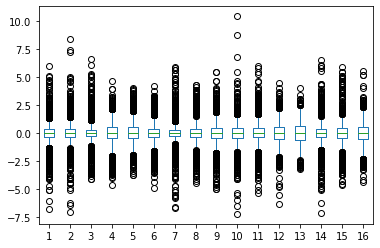

In [37]:
data.plot(kind='box');

In [38]:
freq = np.linspace(1, sf/2, 50)
w = 3
widths = w * (sf) / (2 * freq * np.pi)
cwtm=[]
for element in range(16):
  cwtm.append(np.abs(signal.cwt(data.iloc[:,element], signal.morlet2, widths, w=w)))
cwtm = np.array(cwtm)

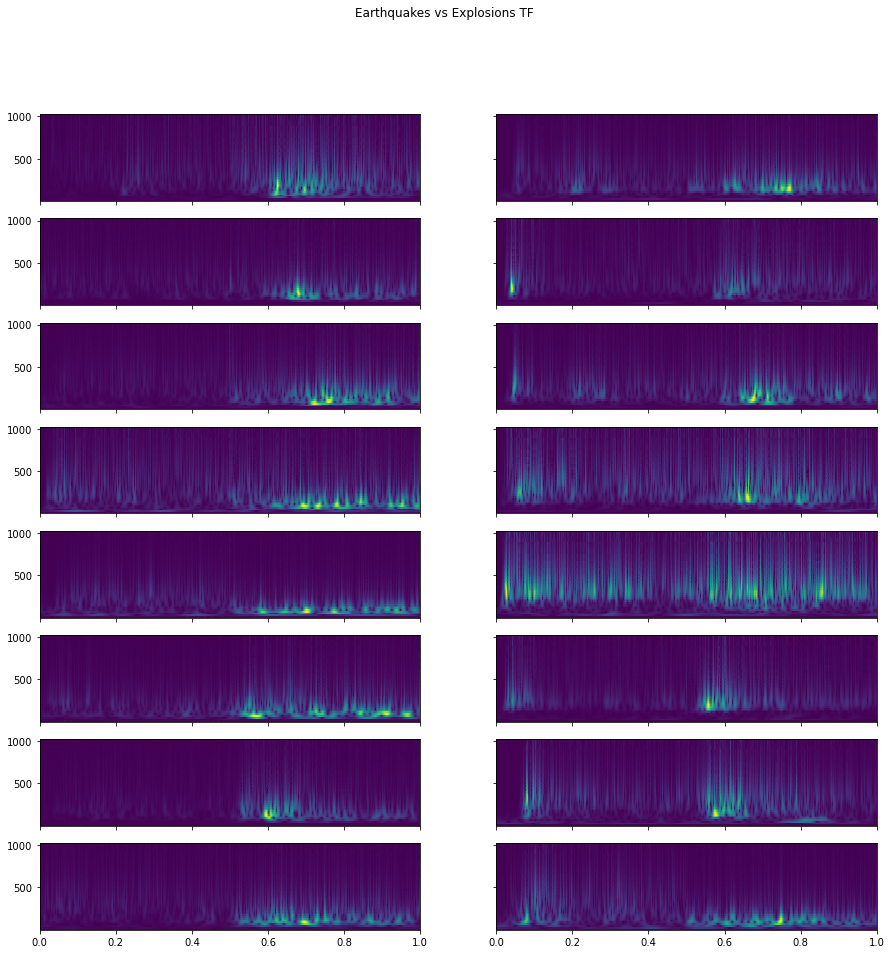

In [41]:
sf=2048
t=np.linspace(0,data.shape[0]/sf,data.shape[0])
fig ,ax = plt.subplots(8, 2,sharex=True,sharey=True,figsize=(15,15))
ax=ax.ravel(order='F')
for ii,iax in enumerate(ax):
  ax[ii].pcolormesh(t, freq, cwtm[ii,:,:], cmap="viridis")
fig.suptitle('Earthquakes vs Explosions TF');

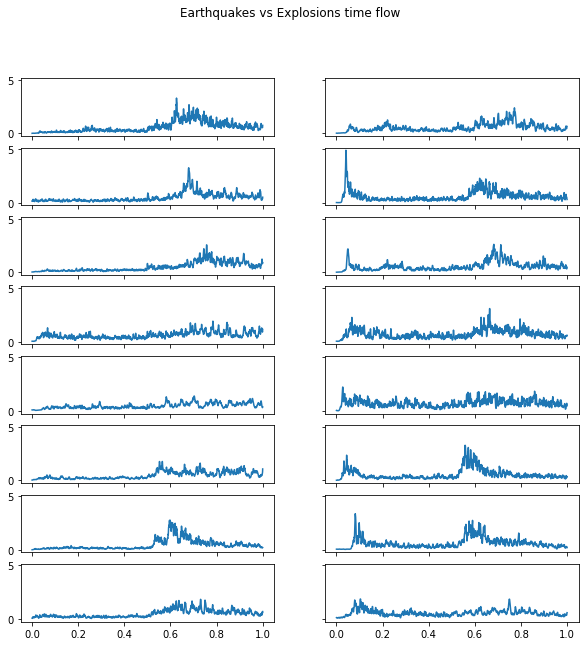

In [44]:
sf=2048
t=np.linspace(0,data.shape[0]/sf,data.shape[0])
fig ,ax = plt.subplots(8, 2,sharex=True,sharey=True,figsize=(10,10))
ax=ax.ravel(order='F')
for ii,iax in enumerate(ax):
  ax[ii].plot(t,  np.mean(cwtm[ii,:,:],axis=0))
fig.suptitle('Earthquakes vs Explosions time flow');

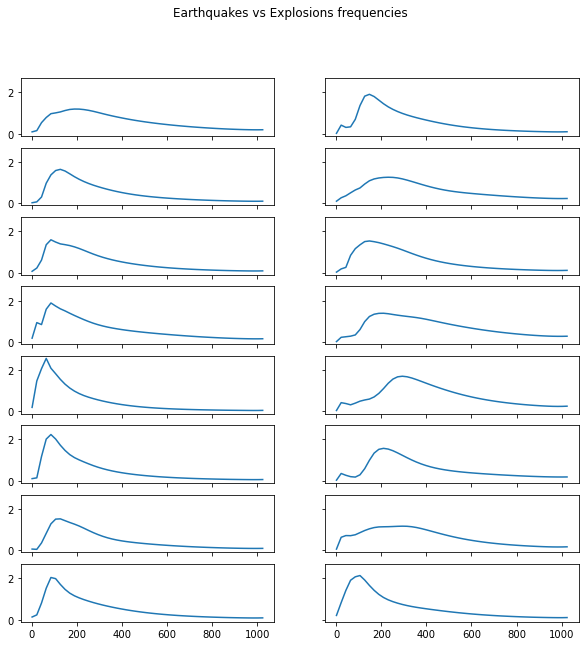

In [45]:
sf=2048
t=np.linspace(0,data.shape[0]/sf,data.shape[0])
fig ,ax = plt.subplots(8, 2,sharex=True,sharey=True,figsize=(10,10))
ax=ax.ravel(order='F')
for ii,iax in enumerate(ax):
  ax[ii].plot(freq,  np.mean(cwtm[ii,:,:],axis=1))
fig.suptitle('Earthquakes vs Explosions frequencies');

---
>> **TASK**
>>
>> Recorded neural response to rapidly changing stimulus (~200 trials).
>>
>> exam/A5/itpc.csv
>>
>> Find:
>>
>> - Stimulus parameters (duration, frequency).
>> - Time and frequency range of maximum response.
>> - Time and frequency when maximum syncrony with the stimulus occurs.

---

In [2]:
data=pd.read_csv('itpc.csv')
data.head()

,Unnamed: 0,time,condition,epoch,FCz
0,0,-1000,1,1,-11.539653
1,1,-1000,1,1,-9.631297
2,2,-999,1,1,-9.473975
3,3,-999,1,1,-9.162348
4,4,-998,1,1,-6.822595


In [3]:
df=data.pivot_table(values='FCz',index="time",columns='epoch')
df.head()

epoch,1,2,3,4,7,8,9,10,11,12,...,188,189,190,193,194,195,196,197,198,199
time,,,,,,,,,,,,,,,,,,,,,
-1000,-10.585475,4.240725,1.937425,-1.608814,-6.468468,10.135967,-3.860459,-5.874261,-0.828740,-2.860810,...,-7.142846,-0.275788,-4.168537,-13.968529,-1.967031,-6.092885,-8.827048,3.458224,-1.784743,3.114179
-999,-9.318161,2.774376,0.748161,-1.190328,-5.730957,7.771272,-4.965229,-5.673614,0.641295,-3.315240,...,-4.542003,-1.912385,-0.358764,-14.702289,-4.382348,-4.732313,-8.521654,2.428464,-4.249392,4.085235
-998,-7.454085,4.997100,2.987263,-5.244094,-4.015588,9.638979,-2.669538,-6.539603,-2.548009,-0.895219,...,-6.778825,-0.460494,-1.684103,-15.658019,-3.103960,-4.283330,-8.512412,3.678951,-2.644601,2.070464
-997,-6.682286,4.286374,5.494529,-2.092822,-2.980538,10.781333,-4.234645,-6.176671,-2.167974,0.257142,...,-7.326194,-0.449405,-0.590811,-17.185505,-2.276361,-5.597742,-10.175545,0.641665,-2.661765,-0.210873
-996,-4.147392,6.019745,4.694280,-2.582550,-4.401663,10.114023,-6.562434,-8.765356,-3.491086,0.197326,...,-6.547660,-2.991757,1.332871,-16.920442,-1.866093,-3.147529,-11.035920,0.020636,0.097303,-0.808444


In [4]:
sf=1000
df.index

Int64Index([-1000,  -999,  -998,  -997,  -996,  -995,  -994,  -993,  -992,
             -991,
            ...
             1991,  1992,  1993,  1994,  1995,  1996,  1997,  1998,  1999,
             2000],
           dtype='int64', name='time', length=3001)

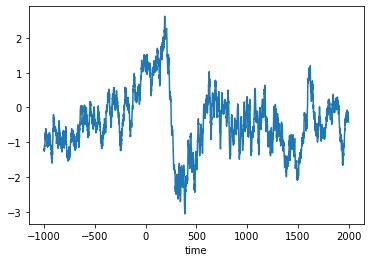

In [5]:
erp=df.mean(axis=1)
erp.plot();

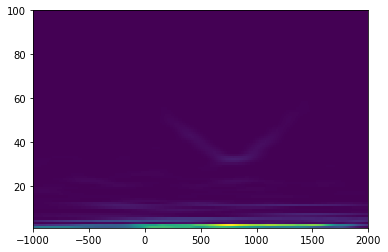

In [6]:
freq = np.linspace(1, sf/2, 500)
w = 20
widths = w * (sf) / (2 * freq * np.pi)
cwtm=np.abs(signal.cwt(erp, signal.morlet2, widths, w=w))**2
cwtm_base = np.mean(cwtm[:,0:900],axis=1)
plt.pcolormesh(erp.index, freq, cwtm, cmap="viridis")
plt.ylim(1,100);

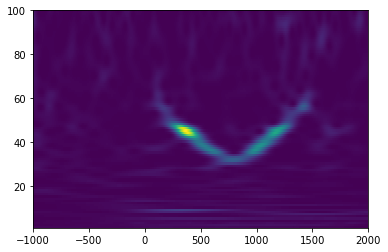

In [7]:
freq = np.linspace(1, sf/2, 500)
w = 20
widths = w * (sf) / (2 * freq * np.pi)
cwtm=np.abs(signal.cwt(erp, signal.morlet2, widths, w=w))**2
cwtm_base = np.mean(cwtm[:,0:900],axis=1)
plt.pcolormesh(erp.index, freq, cwtm/np.expand_dims(cwtm_base,axis=1), cmap="viridis")
plt.ylim(1,100);

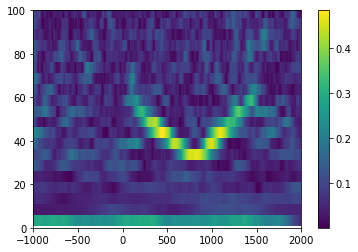

In [14]:
sf=1000
freq = np.linspace(1, sf/2, 100)
w = 20
widths = w * (sf) / (2 * freq * np.pi)
cwtm=[]
for element,_ in enumerate(df):
  cwtm.append(signal.cwt(df.iloc[:,element], signal.morlet2, widths, w=w))

A = np.abs(np.mean(np.exp(1j*np.angle(cwtm)), axis=0))
plt.pcolormesh(
    erp.index.values,
    freq,
    A,
    cmap="viridis",
);
plt.ylim([0, 100])
plt.colorbar();